# Using train_durations.parquet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet(
    "https://storage.googleapis.com/birdclef-eda-f22/data/processed/train_durations.parquet"
)
df.head()

,filename,duration
0,afrsil1/XC125458.ogg,11.102041
1,afrsil1/XC175522.ogg,47.020408
2,afrsil1/XC177993.ogg,53.760000
3,afrsil1/XC205893.ogg,105.482449
4,afrsil1/XC207431.ogg,3.395918


In [2]:
print(f"{df.duration.sum()/3600:.2f} hours of audio")

190.56 hours of audio


## distribution of durations

It's usually interesting to plot datasets on a log scale. We often see power-scaling on natural phenomena (e.g. letter distributions). Here, we get something that looks log-normal.

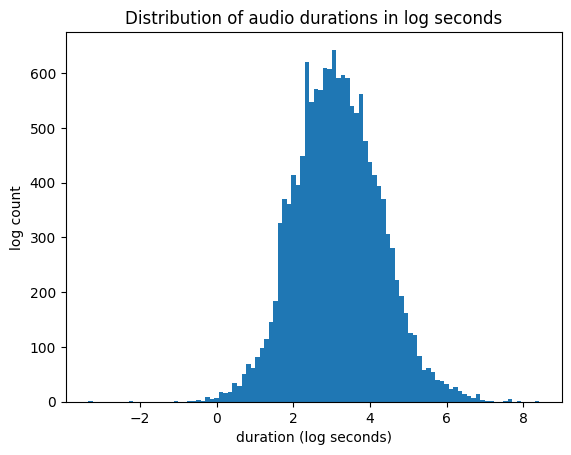

In [3]:
X = df.duration.apply(np.log)
plt.hist(X, bins=100)
plt.xlabel("duration (log seconds)")
plt.ylabel("log count")
plt.title("Distribution of audio durations in log seconds")
plt.show()

## merging durations with metadata

The `train_metadata` dataset is missing durations, so here's a reference on how to join the two together.

In [4]:
train_metadata_df = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/train_metadata.csv"
)
merged_df = pd.merge(
    df,
    train_metadata_df[["filename", "primary_label", "secondary_labels", "type"]],
    on="filename",
)

merged_df.head()

,filename,duration,primary_label,secondary_labels,type
0,afrsil1/XC125458.ogg,11.102041,afrsil1,[],"['call', 'flight call']"
1,afrsil1/XC175522.ogg,47.020408,afrsil1,"['houspa', 'redava', 'zebdov']",['call']
2,afrsil1/XC177993.ogg,53.760000,afrsil1,[],"['call', 'song']"
3,afrsil1/XC205893.ogg,105.482449,afrsil1,[],"['alarm call', 'call']"
4,afrsil1/XC207431.ogg,3.395918,afrsil1,[],['flight call']
